# Importing All the Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
data_set = pd.read_csv("./train.csv")

In [4]:
untouched_data = pd.read_csv("./train.csv")
untouched_cols = list(data_set._get_numeric_data())

In [5]:
data_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data_set.shape

(1460, 81)

# Data Preprocessing

In [7]:
summary = data_set.describe()

In [8]:
type(summary)

pandas.core.frame.DataFrame

In [10]:
summary_mean = summary.loc["mean"]
summary_mean

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [11]:
summary_std = summary.loc["std"]
summary_25percentile = summary.loc["25%"]
summary_75percentile = summary.loc["75%"]
summary_50percentile = summary.loc["50%"]

In [14]:
cols = list(data_set._get_numeric_data())
data_set[cols].columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Creating a Function for Finding Outliers

In [16]:
def findOutlier(data_set):
    outliers = []
    for value in data_set:
        if np.abs(value) > 3:
            outliers.append(value)
    return outliers

# Finding Outliers Through Z-Score

In [17]:
zscore_values = []
for value in range(38):
    for element in data_set[cols[value]]:
        zscore = (element-summary_mean[value])/summary_std[value]
        zscore_values.append(zscore)
print(zscore_values)

[-1.7302720139212653, -1.7279001537239778, -1.7255282935266902, -1.7231564333294027, -1.7207845731321152, -1.7184127129348277, -1.7160408527375401, -1.7136689925402526, -1.7112971323429649, -1.7089252721456774, -1.7065534119483898, -1.7041815517511023, -1.7018096915538148, -1.6994378313565273, -1.6970659711592397, -1.6946941109619522, -1.6923222507646647, -1.689950390567377, -1.6875785303700894, -1.685206670172802, -1.6828348099755144, -1.6804629497782269, -1.6780910895809393, -1.6757192293836518, -1.6733473691863643, -1.6709755089890768, -1.668603648791789, -1.6662317885945015, -1.663859928397214, -1.6614880681999264, -1.659116208002639, -1.6567443478053514, -1.6543724876080639, -1.6520006274107764, -1.6496287672134888, -1.6472569070162013, -1.6448850468189136, -1.642513186621626, -1.6401413264243385, -1.637769466227051, -1.6353976060297635, -1.633025745832476, -1.6306538856351884, -1.628282025437901, -1.6259101652406134, -1.6235383050433256, -1.6211664448460381, -1.6187945846487506, 

In [18]:
findOutlier(zscore_values)

[3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 3.1465943981111675,
 4.280465478802926,
 4.280465478802926,
 3.2921910165859543,
 3.0451224010317115,
 3.2510129139935806,
 10.004221739142883,
 4.033396863248683,
 4.609890299541916,
 3.703972042509692,
 3.374547221770702,
 10.004221739142883,
 3.4157253243630756,
 3.982879142787403,
 14.876187830274892,
 20.511245148264887,
 15.443250225506885,
 4.267011466617426,
 6.035725163689082,
 

# Finding and Replacing Outliers Through Inter-Quartile Range

In [1]:
for value in range(38):
    q1 = summary_25percentile[value]
    q3 = summary_75percentile[value]
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    a = np.array(data_set[cols[value]])
    p98 = np.nanpercentile(a, 98)
    p2 = np.nanpercentile(a, 2)
    for element in data_set[cols[value]]:
        if element < lower_bound:
            data_set.at[element, cols[value]] = p2
        elif value > upper_bound:
            data_set.at[element, cols[value]] = p98

NameError: name 'summary_25percentile' is not defined

# Distribution of SalePrice Target Variable

In [20]:
SalePrice_NoNull = data_set['SalePrice'].dropna()

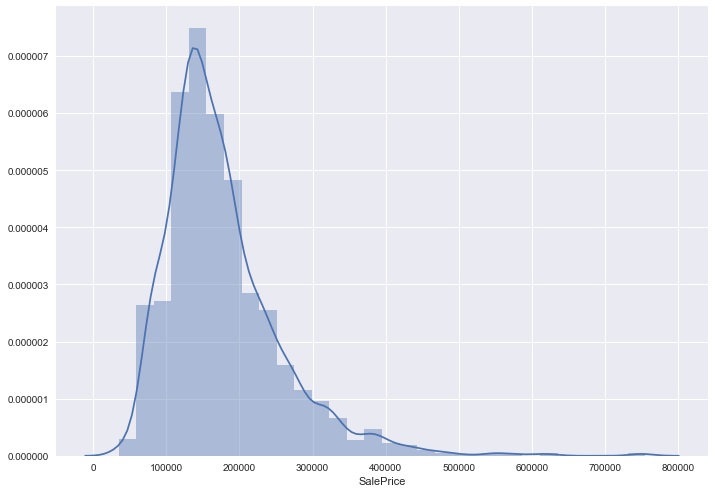

In [21]:
#visualization of the distribution of the target variable: SalePrice
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(SalePrice_NoNull, bins=30)
plt.show()

# Correlation Matrix Using Heatmaps

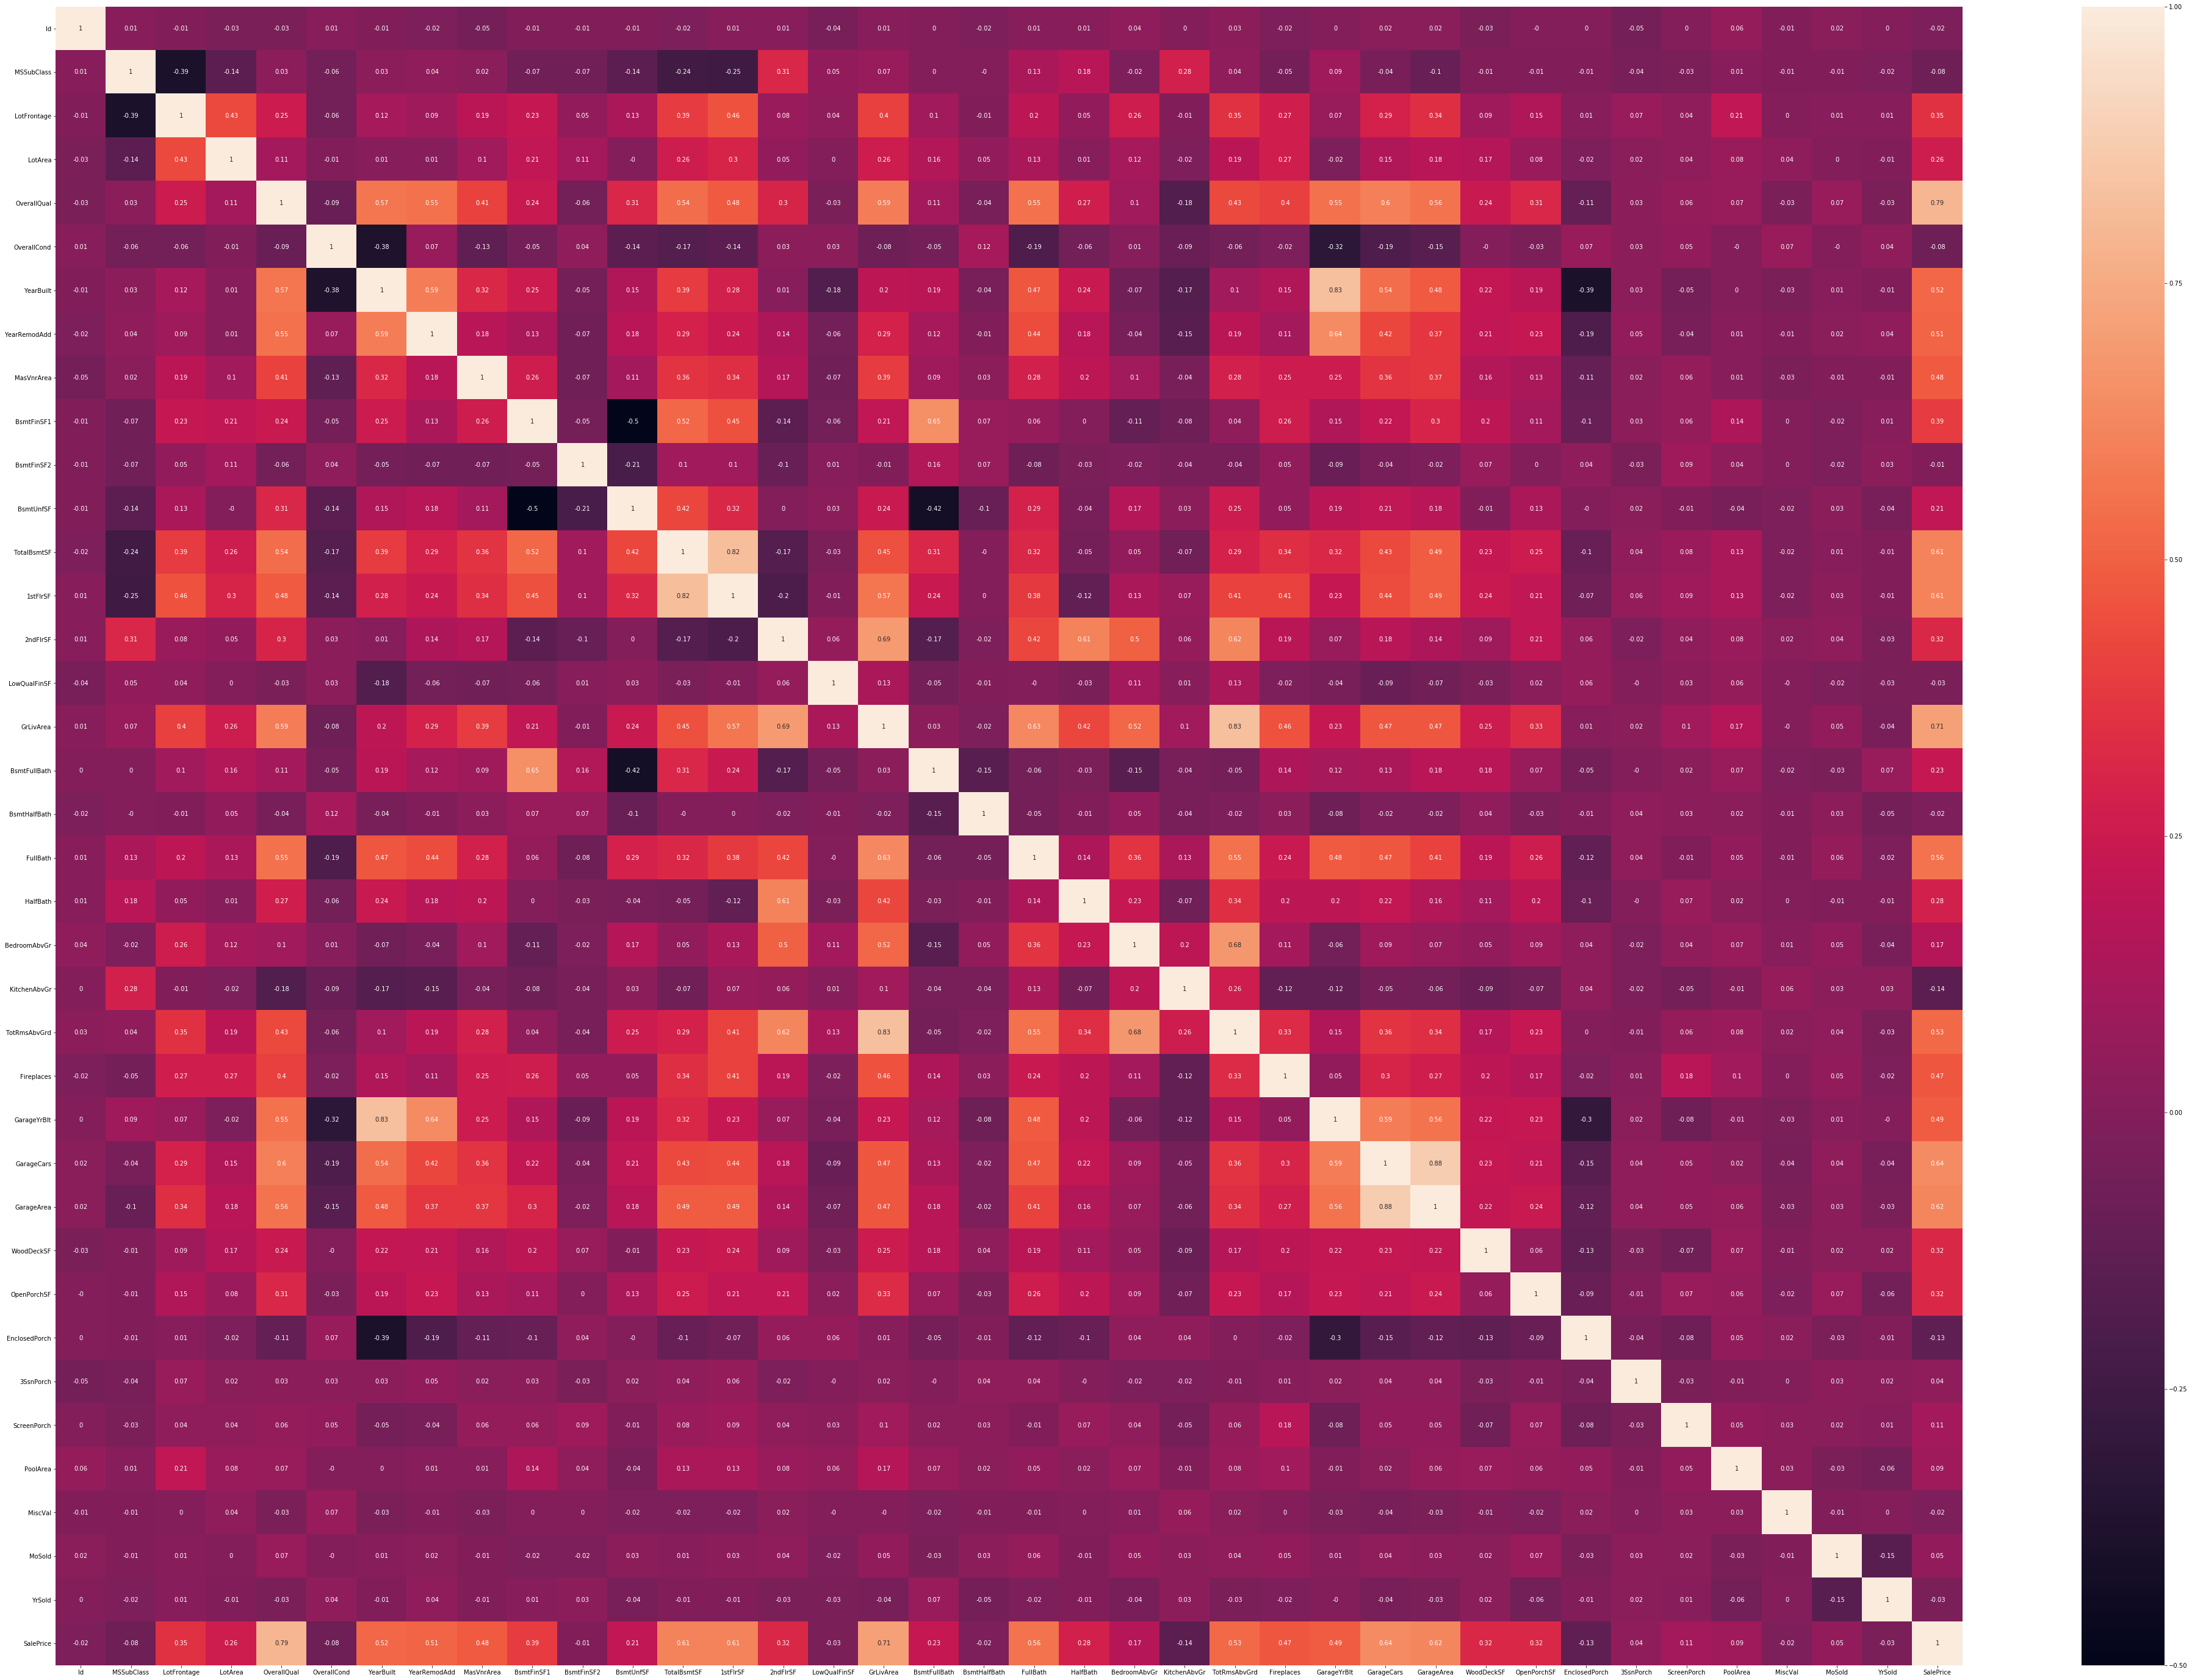

In [12]:
#I used a heat map to visualize a correlation matrix. The variables 'OverallQual', 'GrLivArea'
#are strongly correlated with SalePrice so I chose those

correlation_matrix = untouched_data.corr().round(2)
fig, ax = plt.subplots(figsize=(70,50)) 
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

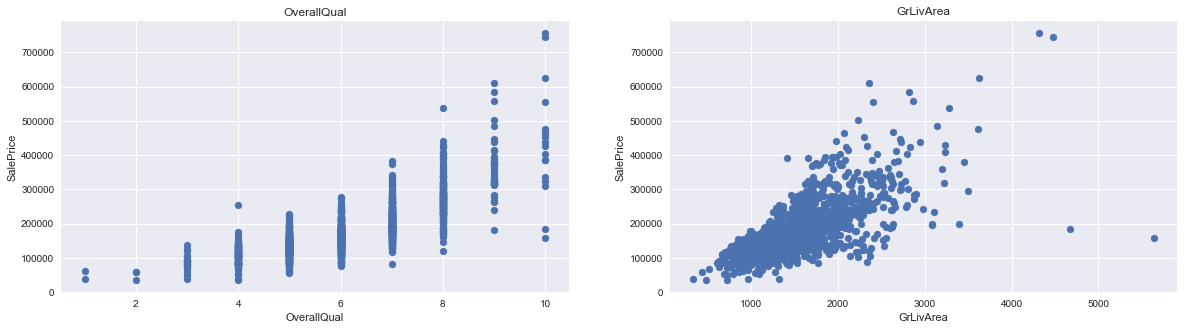

In [23]:
plt.figure(figsize=(20, 5))

features = ['OverallQual', 'GrLivArea']
target = data_set['SalePrice']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data_set[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('SalePrice')

# Linear Regression Model Using StatsModel and SKLearn

## Independent Variable: Overall Qual
## Dependent Variable: SalePrice

In [34]:
X = data_set.iloc[:, 17:18]
X = X.dropna()
y = data_set.iloc[:, 80:81]
y = y.dropna()
#X = sm.add_constant(X)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y[:1459], test_size = 0.3)

In [52]:
X_train.shape

(1022, 1)

In [53]:
y_train.shape

(1022, 1)

In [54]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)#check prediction values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:47:36   Log-Likelihood:                -12594.
No. Observations:                1022   AIC:                         2.519e+04
Df Residuals:                    1021   BIC:                         2.519e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual   3.05e+04    273.739    111.428      0.000       3e+04     3.1e+04
==============================================================================
Omnibus:                      668.371   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10860.698
Skew:                           2.754   Prob(JB):                         0.00
Kurtosis:                      17.990   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

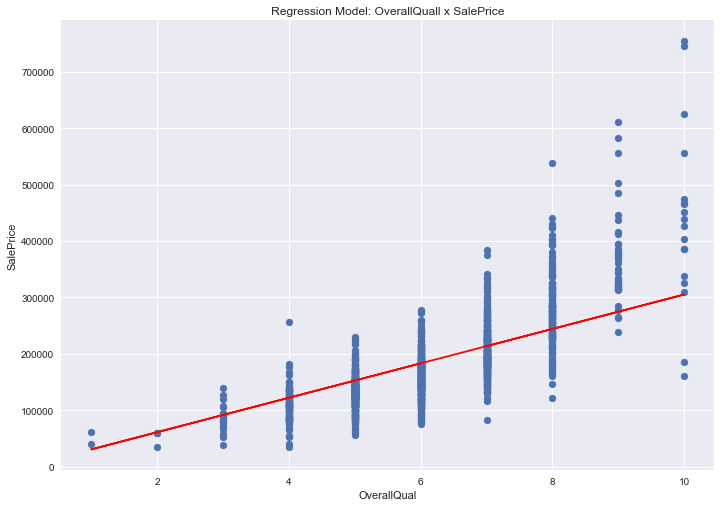

In [55]:
features = ['OverallQual']
target = data_set['SalePrice']

for i, col in enumerate(features):
    #plt.subplot(1, len(features) , i+1)
    x = data_set[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Regression Model: OverallQuall x SalePrice")
    plt.xlabel(col)
    plt.ylabel('SalePrice')
#plt.scatter(X, y, color = "black")
plt.plot(X_test, predictions, color = "red")
model.summary()

# Model 2:
## Indepedent Variable: GrLivArea
## Dependent Variable: SalePrice

In [63]:
X = data_set["GrLivArea"].dropna()
y = data_set["SalePrice"].dropna()
#X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X[:1459], y[:1459], test_size = 0.3)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)#check prediction values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.306e+04
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:49:08   Log-Likelihood:                -12564.
No. Observations:                1022   AIC:                         2.513e+04
Df Residuals:                    1021   BIC:                         2.513e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea    118.3163      1.035    114.291      0.000     116.285     120.348
==============================================================================
Omnibus:                      124.516   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.444
Skew:                           0.123   Prob(JB):                    6.09e-243
Kurtosis:                       8.112   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

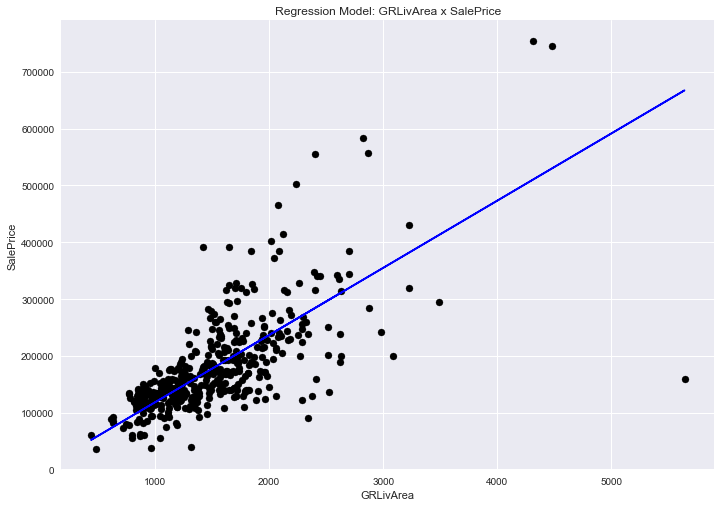

In [64]:
plt.scatter(X_test, y_test, color = "black")
plt.plot(X_test, predictions, color = "blue")
plt.title("Regression Model: GRLivArea x SalePrice")
plt.xlabel("GRLivArea")
plt.ylabel('SalePrice')
model.summary()

# Multivariate Linear Regression
## Independent Variables: OverallQual and GrLivArea
## Dependent Variable: SalePrice

In [347]:
X = data_set[["OverallQual", "GrLivArea"]].dropna()
y = data_set["SalePrice"].dropna()
X = sm.add_constant(X)

In [348]:
X.shape

(1460, 3)

In [349]:
y.shape

(1460,)

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)#check prediction values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     1268.
Date:                Fri, 12 Jul 2019   Prob (F-statistic):          3.03e-277
Time:                        14:06:53   Log-Likelihood:                -12385.
No. Observations:                1022   AIC:                         2.478e+04
Df Residuals:                    1019   BIC:                         2.479e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.097e+05   6198.606    -17.693      0.000   -1.22e+05   -9.75e+04
OverallQual   3.28e+04   1240.359     26.440      0.000    3.04e+04    3.52e+04
GrLivArea      60.4525      3.284     18.406      0.000      54.007      66.898
==============================================================================
Omnibus:                      262.334   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6483.829
Skew:                           0.576   Prob(JB):                         0.00
Kurtosis:                      15.286   Cond. No.                     7.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""